In [84]:
import matplotlib.pyplot as plt
import gzip
import numpy as np
from numpy.linalg import *
from matplotlib import rcParams
from sklearn import linear_model


rcParams.update({'font.size': 18})

In [4]:
%matplotlib inline

In [ ]:
#functions that are used throughout 
def find_results(data, x):
    #Takes the data and the x results of a fit and finds the predicted results 
    # along with the predicted results maximized by each column
    f = np.matmul(data, x)
    f_max = np.zeros(f.shape)
    for i in range(len(data)):
        f_max[i, np.argmax(f[i])] = 1
    return f, f_max

def find_error(data, labels, x):
    #finds the error in the results and the maximized results.
    f, f_max = find_results(data, x)
    f_error = np.linalg.norm(labels - f1, ord=2)/np.linalg.norm(labels, ord=2)
    f_max_error = np.linalg.norm(labels - f1_max, ord=2)/np.linalg.norm(labels, ord=2)
    return f_error, f_max_error

def count_num_zero(x):
    #counts the number of elements that have zero for all 10
    print(len(x))
    num_zero= 0
    for i in range(len(x)):
        if(max(x[i]))==0:
            num_zero += 1
    return num_zero

In [38]:

f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000 


print(image_size * image_size * num_images)
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
print(len(data))
print(len(buf))
data = data.reshape(num_images, image_size* image_size)

print(data.shape)


# image = np.asarray(data[3]).squeeze()
# plt.imshow(image)
# plt.show()

47040000
47040000
47040000
(60000, 784)


In [23]:
60007*784

47045488

In [66]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(image_size * image_size * num_images)
labels_num = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

# print(labels_num[3:10])
print(labels_num.shape)

#set_up b vector right
labels = np.zeros([num_images, 10])
# print(labels[1][1])
for i in range(num_images):
    if labels_num[i] == 0:
        labels[i,9] = 1
    else:
        index = int(labels_num[i] - 1)
        labels[i][index] = 1
print(labels)

(60000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [185]:
#get test data
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

# image_size = 28
num_images_test = 10000 
f.read(16)
buf = f.read(image_size * image_size * num_images_test)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_images_test, image_size* image_size)

print(test_data.shape)

f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(image_size * image_size * num_images_test)
labels_num = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

# print(labels_num[3:10])
# print(labels_num.shape)

#set_up b vector right
test_labels = np.zeros([num_images_test, 10])
# print(labels[1][1])
for i in range(num_images_test):
    if labels_num[i] == 0:
        test_labels[i,9] = 1
    else:
        index = int(labels_num[i] - 1)
        test_labels[i][index] = 1
print(test_labels.shape)

(10000, 784)
(10000, 10)


In [145]:
print(labels.shape)
print(data.shape)
print(data)

(60000, 10)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


[[ 2.98117306e+03 -2.55353355e+03  3.25217172e+03 ... -2.76948865e+03
  -3.32957297e+02 -5.79806994e+02]
 [ 5.08739896e+06 -4.35762825e+06  5.54986064e+06 ... -4.72615759e+06
  -5.68194657e+05 -9.89445912e+05]
 [ 5.62988806e+07 -4.82229907e+07  6.14166383e+07 ... -5.23012612e+07
  -6.28783460e+06 -1.09495437e+07]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [219]:
tup  = np.linalg.lstsq(data, labels)
x1 = tup[0]
f1, f1_max = find_results(data, x1)
error1, error1_max = find_error(data, labels, x)
print(error1)

C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


0.7807603287250168


In [218]:

f,f_max = find_results(data, x1)
f_error, f_max_error = find_error(data, labels, x1)
print(f_max_error)
print(f_error)

0.6969850378403579
0.7807603287250168


In [156]:
print(data.shape)
print(labels.shape)
print(x1.shape)

(60000, 784)
(60000, 10)
(784, 10)


-0.00011041669131373055


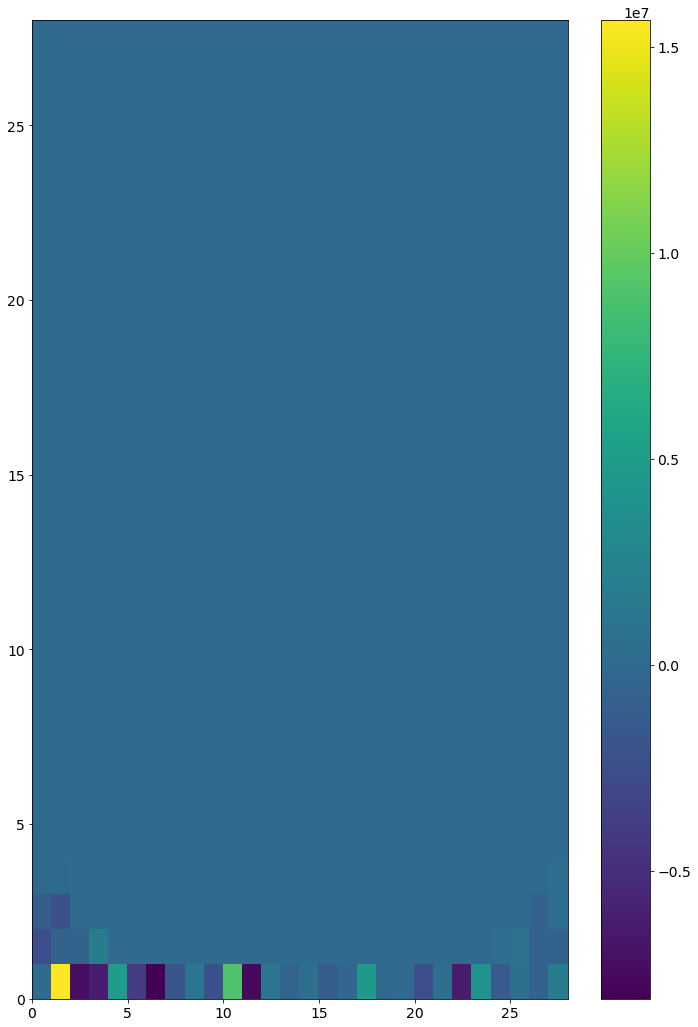

In [220]:
# print(norm(x1, axis = 1))
normed = norm(x1, axis = 1, ord = 2)
first = x1[:,9]
box = first.reshape(image_size, image_size)
print(box[5,5])
# print(box)
# x1_norm = norm(x1_box, axis = 2)
plt.pcolor(box)
plt.colorbar()

In [76]:
x2 = np.matmul(np.linalg.pinv(data), labels)
f2 = np.matmul(data, x2)
error2 = np.linalg.norm(labels - f2, ord=2)/np.linalg.norm(labels, ord=2)
print(error2)

0.6253029058030866


In [177]:
print(f2)

[[ 6.01637709e-03 -9.42155201e-02  4.31818646e-01 ... -1.30370702e-01
  -1.01425197e-01  8.72580175e-02]
 [ 1.50467594e-02 -1.05843195e-01  3.36192654e-03 ... -1.51233130e-02
   8.70378492e-02  8.56458949e-01]
 [ 4.84594832e-04  1.42369393e-01  1.63252042e-01 ...  2.43796721e-02
  -1.73897671e-01 -1.34864638e-01]
 ...
 [-1.27520023e-01 -1.70858692e-01  1.55834427e-01 ...  2.30084881e-01
   4.55844311e-02 -8.55196693e-02]
 [-5.54612874e-02 -1.43128608e-01  6.08497176e-02 ... -1.84915614e-01
   1.95291322e-02  5.90635932e-02]
 [-1.12900399e-01 -6.61123410e-03 -7.91252300e-02 ...  4.80711107e-01
   1.82276820e-01  1.70392250e-01]]


In [101]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(data, labels)
x3 = clf.coef_
f3 = clf.predict(data)
error3 = np.linalg.norm(labels - f3, ord=2)/np.linalg.norm(labels, ord=2)
print(error3)

0.7893759559168135


In [137]:
clf = linear_model.Lasso(alpha=0.8)
clf.fit(data, labels)
x4 = clf.coef_
f4 = clf.predict(data)
error4 = np.linalg.norm(labels - f4, ord=2 )/np.linalg.norm(labels, ord=2)
print(error4)

0.8283162477830476


(10, 784)


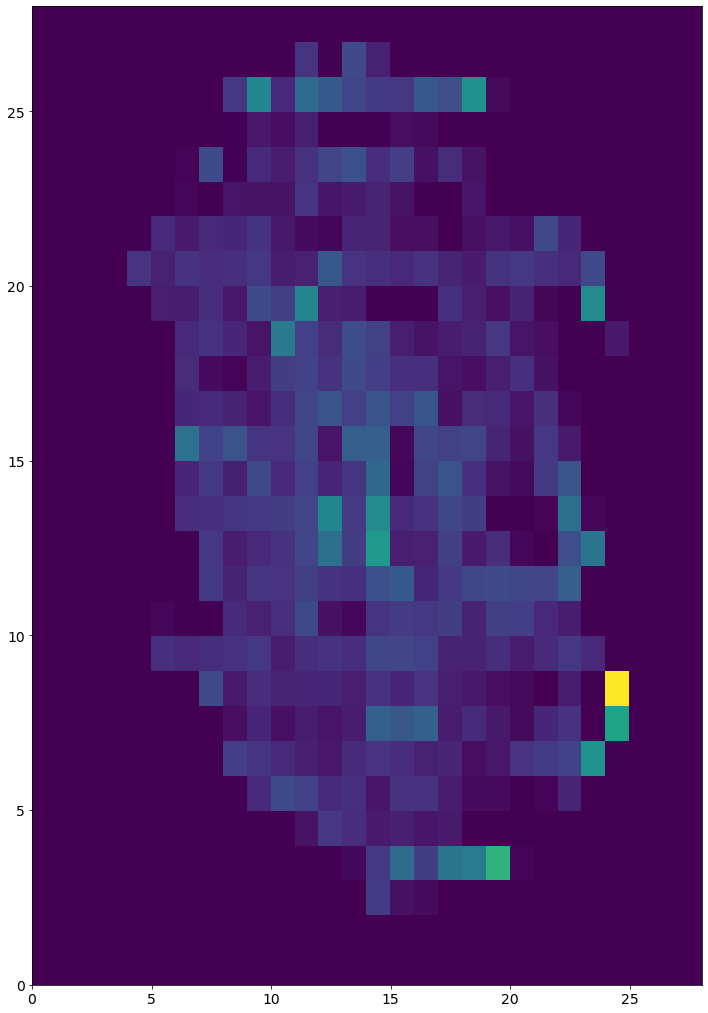

In [149]:
print(x4.shape)
x4_trans = np.transpose(x4)
# print(norm(x4, axis = 0))
normed = norm(x4_trans, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
plt.pcolor(box)


In [222]:
clf = linear_model.Lasso(alpha=0.001)
clf.fit(data, labels)
x5 = clf.coef_
f5 = clf.predict(data)
error5 = np.linalg.norm(labels - f5, ord=2 )/np.linalg.norm(labels, ord=2)
print(error5)

0.7811641636547713


In [179]:
print(data.shape)

(60000, 784)


(10, 784)


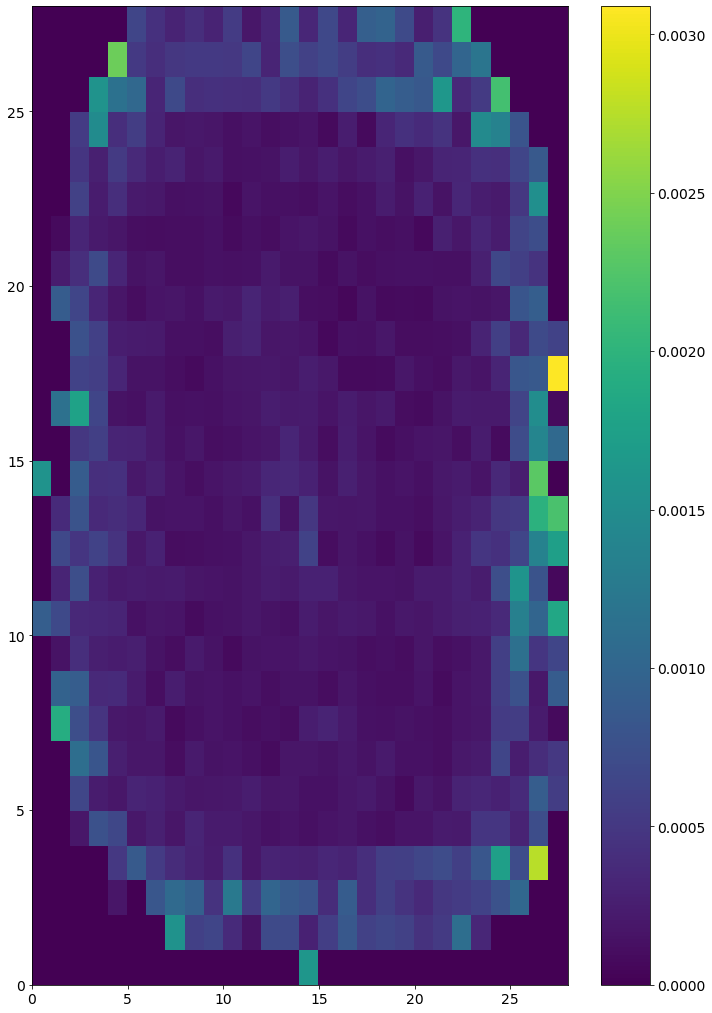

In [223]:
print(x5.shape)
x5_trans = np.transpose(x5)
# print(norm(x4, axis = 0))
normed = norm(x5_trans, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
plt.pcolor(box)
plt.colorbar()

In [231]:
def count_num_zero(x):
    print(len(x))
    num_zero= 0
    for i in range(len(x)):
        if(max(x[i]))==0:
            num_zero += 1
    return num_zero

print(count_num_zero(x5_trans))

784
116


In [229]:
print(x5_trans[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [114]:
#robust and ridge too
ridge = linear_model.Ridge(alpha=1.0).fit(data,labels)
x6 = ridge.coef_
f6 = ridge.predict(data)
error6 = np.linalg.norm(labels-f6,ord=2)/np.linalg.norm(labels,ord=2)

C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03801e-11): result may not be accurate.
  overwrite_a=True).T


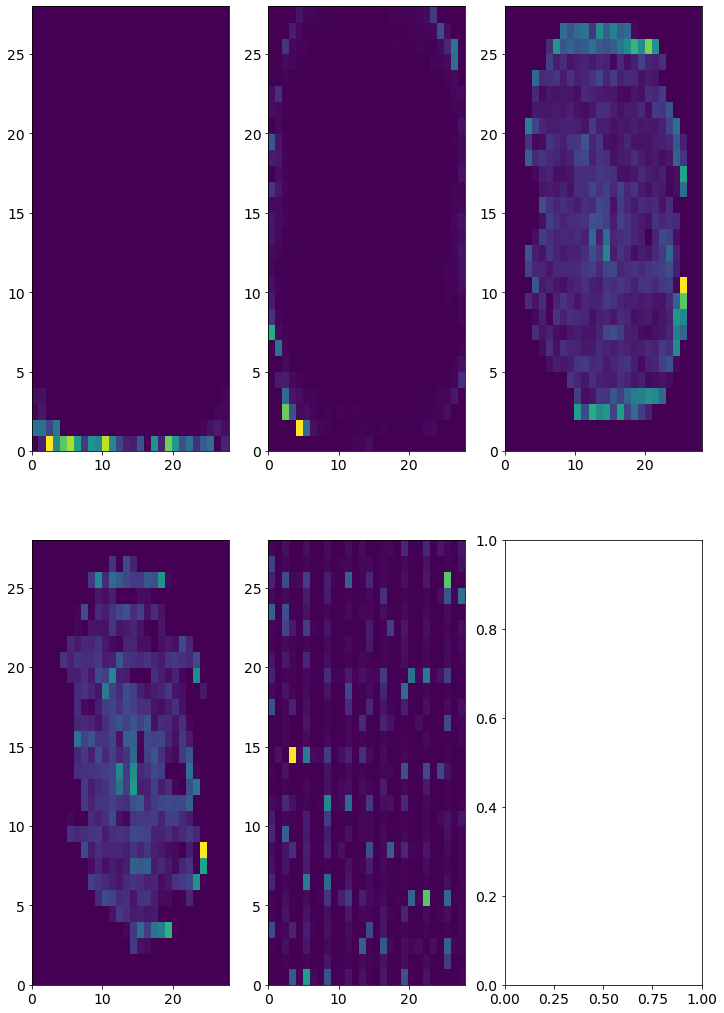

In [150]:
fig, ax = plt.subplots(2, 3)

x1_box = x1.reshape(image_size, image_size,10)
x1_norm = norm(x1_box, axis = 2)
ax[0, 0].pcolor(x1_norm)
# plt.colorbar()

x2_box = x2.reshape(image_size, image_size,10)
x2_norm = norm(x2_box, axis = 2)
ax[0, 1].pcolor(x2_norm)
# ax[0, 1].colorbar()

x3_box = x3.reshape(10, image_size, image_size)
x3_norm = norm(x3_box, axis = 0)
ax[0, 2].pcolor(x3_norm)
# ax[0, 2].colorbar()

x4_box = x4.reshape(10, image_size, image_size)
x4_norm = norm(x4_box, axis = 0)
ax[1, 0].pcolor(x4_norm)
# ax[1, 0].colorbar()

x6_box = x6.reshape(image_size, image_size,10)
x6_norm = norm(x6_box, axis = 2)
ax[1, 1].pcolor(x6_norm)
# ax[1, 1].colorbar()